# ARIMA Model for Predicting Tesla Stock Price

**Author:** yejin

**References:**
- [Predict Stock Price using ARIMA model (Python)](https://www.youtube.com/watch?v=rsva2qmhGyE)
- [How to Choose the p, d, q Terms to Build ARIMA Model](https://www.youtube.com/watch?v=gqryqIlvEoM)

**Environment:** Python(pyenv 3.11.11)

In [1]:
# Ensure project root is on sys.path for `import models`
import sys, os
PROJECT_ROOT = os.path.abspath(os.path.join(os.getcwd(), '..'))
if PROJECT_ROOT not in sys.path:
    sys.path.insert(0, PROJECT_ROOT)


In [2]:
# Import everything from models.arima through models package re-exports
from models import *

# Optional: turn off warnings at notebook level
import warnings
warnings.filterwarnings('ignore')


=== ARIMA Model for Tesla Stock Price Prediction ===

=== ARIMA Model Configuration ===

📅 Available data range: 2022-07-21 to 2025-07-24
📊 Total data points: 755

Configuration:
   Training period: 2025-02-01 to 2025-06-20
   Prediction days: 5
✓ Testing data: 3 samples (for validation)
✓ Training data: 96 samples
✓ Total training samples: 96

Price Statistics:
  Mean: $297.82
  Std: $44.84
  Min: $221.86
  Max: $392.21

Stationarity Test (ADF):
  ADF Statistic: -2.1219
  p-value: 0.2358
  → The time series is NON-STATIONARY (p-value > 0.05)
  → We need to find the order of differencing (d)

🔍 Finding optimal ARIMA parameters...
  ⚠️  pmdarima failed: cannot import name '_lazywhere' from 'scipy._lib._util' (/opt/anaconda3/lib/python3.12/site-packages...
  🔍 Performing manual grid search...
  Searching through parameter combinations...
    New best: ARIMA(0, 0, 0) with AIC: 1005.62
    New best: ARIMA(0, 0, 1) with AIC: 916.71
    New best: ARIMA(0, 0, 2) with AIC: 879.20
    New best:

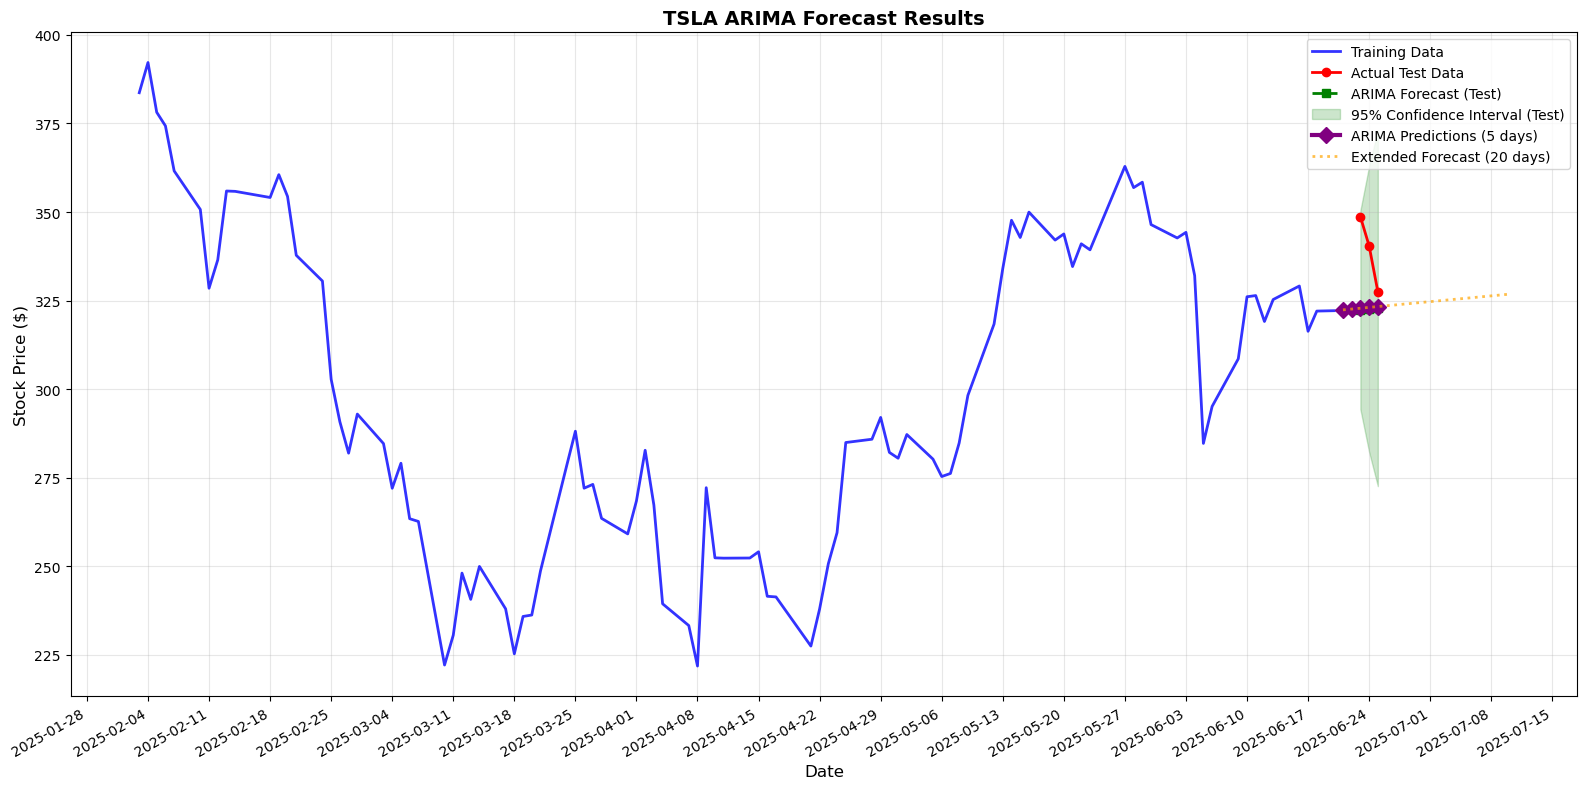


🔍 Model Diagnostics:
  Residuals Statistics:
    Mean: 3.2393
    Std: 45.8421
    Min: -183.3100
    Max: 383.6800
  Ljung-Box test p-value: 0.3282
    → Residuals are not autocorrelated (good!)

🎉 ARIMA analysis completed successfully!
   All major issues have been fixed:
   ✓ Column name consistency ('close' used throughout)
   ✓ Missing forecast_mean variable defined
   ✓ Proper error handling added
   ✓ Visualization code uncommented and fixed
   ✓ Model diagnostics included


In [3]:
from models.arima import main as arima_main
arima_main()